In [26]:
# global var set
import transformers

# model info, change as needed
model_checkpoint = "roberta-large"
batch_size = 4
num_epochs = 10

# fileTag = "clean-v1"                      # clean + no phase + combine    (pure clean)
fileTag = "clean-phase-v1"                # clean +   phase  + combine
#fileTag = 'clean-phase-noCombin-v1'       # clean +   phase  + no combine
#fileTag = 'original-noCheat-noCombin-v1'  # raw   +   no Cheat case
#fileTag = 'original'                        # row   +   keep Cheat case     (pure raw) 

model_checkpoint

'roberta-large'

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [12]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [13]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//5], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5:trainDatasetOriginal.shape[0]//5*2], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*2:]])]), 
                                  'selection2': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*2], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*2:trainDatasetOriginal.shape[0]//5*3], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*3:]])]), 
                                  'selection3': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*3], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*3:trainDatasetOriginal.shape[0]//5*4], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*4:]])]),
                                  'selection4': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*4], 
                                                           trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*4:]]),
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//5 else (1 if x < trainDatasetOriginal.shape[0]//5*2 
                                                                                               else (2 if x < trainDatasetOriginal.shape[0]//5*3 
                                                                                               else (3 if x < trainDatasetOriginal.shape[0]//5*4
                                                                                               else  4))) for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'],
                                   'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//5], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5:testDatasetOriginal.shape[0]//5*2], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*2:]])]), 
                                  'selection2': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*2], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*2:testDatasetOriginal.shape[0]//5*3], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*3:]])]), 
                                  'selection3': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*3], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*3:testDatasetOriginal.shape[0]//5*4], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*4:]])]),
                                  'selection4': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*4], 
                                                           testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*4:]]),
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//5 else (1 if x < testDatasetOriginal.shape[0]//5*2 
                                                                                               else (2 if x < testDatasetOriginal.shape[0]//5*3 
                                                                                               else (3 if x < testDatasetOriginal.shape[0]//5*4
                                                                                               else  4))) for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)


In [14]:
trainDatasetProcessed.to_csv(f'./dataset/5Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,selection4,label
0,"[""funny""]","[""joy:2"", ""trust:2"", ""surprise:2"", ""anticipati...",Sally liked toys alot for xmas.,But then she woke up.,"Professor Smith asked for forgiveness, he'd re...",I was in so much pain.,Six of his friends had the same idea.,4
1,"[""upset""]","[""disgust:2"", ""anger:2"", ""anticipation:2""]",Mary was walking in the park when she heard a ...,"To her surprise, she found it delicious!",I really thought it turned out terrible.,My daughter jumped up and grabbed the blue one...,He had a passion to change his country for bet...,2
2,"[""proud""]","[""joy:3"", ""trust:3""]",They were very sweet when we went to meet them.,They ended up putting on a wonderful show for ...,A red sock had been hidden in the load and dye...,Her mother loved the picture and Jennifer deci...,Kylie invited her to get coffee and the two re...,3
3,"[""happy""]","[""joy:3"", ""trust:2""]","However, her voice cracked when she was trying...",She told me it was everyone and everything.,Gina wanted to sit in her dad's car to be alone.,When the other kids wouldn't move over I'd sta...,Eventually he starts to have favorite televisi...,1
4,"[""anxious"", ""ready"", ""encouraged""]","[""anticipation:2""]",The chef worked his helpers very hard.,She demonstrated the Mac computer and it worke...,Davis decided that he needed to become more ac...,He thought it was a shark.,I got a little lost when it was my turn to hide.,2
...,...,...,...,...,...,...,...,...
53229,"[""none""]","[""none""]",He had to have professionals go in and find it.,They had to stay at a dingy motel nearby.,They had a chance to help hold a hose spraying...,Ted was excited about opening up his new elect...,She saw a small duck swimming around.,4
53230,"[""happy"", ""excited"", ""accepted""]","[""joy:3"", ""trust:3"", ""surprise:3"", ""anticipati...",Amy called her friends to come to a surprise b...,I had no idea I was sitting on the lap of a le...,Lexi finally got the courage to try to sing.,She did not cry but she was very skeptical abo...,"Luckily, his friend lived nearby.",0
53231,"[""nervous""]","[""fear:2"", ""surprise:2"", ""anticipation:2""]",She accidentally hit the emergency brake.,When Rick woke up he couldn't see anyone.,All his roommates loved the smell.,We ended up getting married unnecessarily.,When he got to school he tried to study.,1
53232,"[""confused""]","[""fear:2""]",When Agnes and Allen married they planned to r...,Her teacher promoted her to the next class up.,He didn't know if they were going to take his ...,The neighbor wanted privacy and had erected th...,Ryan was so happy when the neighbor called to ...,2


In [15]:
testDatasetProcessed.to_csv(f'./dataset/5Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,selection4,label
0,"[""strange""]","[""surprise:3""]",Lauren decided to go to the museum.,He is learning French.,Steven brought the couch home and set it up.,His wife was terribly embarrassed.,She really wanted to speak!,4
1,"[""lively""]","[""joy:3"", ""trust:2"", ""surprise:2""]",Daniel is driving home from work.,"Every since I could remember, I didn't feel li...",A substitute teacher came to teach her class f...,After that the horse let him ride for a long t...,It was dark and they were scary.,3
2,"[""relieved"", ""thankful""]","[""joy:3""]",He called his mom to bring some spare keys.,The girl he liked read the letter and was quit...,His mom came and unlocked the car.,Mr Cooper found out about the affair after com...,Ben worked on a report late at night.,2
3,"[""satisfied""]","[""joy:2"", ""trust:2"", ""surprise:2"", ""anticipati...",Which made more milk come out.,The next day Sam happily took his stolen blue ...,He had never played before and spent many hour...,While their guard was down the opposition reta...,So he put frozen pizza in his oven.,2
4,"[""helpful""]","[""joy:3"", ""trust:2"", ""anticipation:2""]",She ate it for lunch everyday for a week.,He took his job very seriously.,He lives so far out into the country that he s...,"When he got to the restaurant, he stood where ...","After that day, every time I got in the pool I...",1
...,...,...,...,...,...,...,...,...
51886,"[""nervous""]","[""fear:2"", ""surprise:2"", ""anticipation:3""]",Joe and Jim were avid hikers.,And drinking the coffee made her feel warm.,He went shopping for the food he would cook.,"He was worried about one thing, though.",He dressed and he took the bus to work,3
51887,"[""clever""]",[],The vet gave it some medicine.,It was far too sour and Suzy never wanted coff...,She assumed it was because of the coal power p...,After much thought he laid his coat on the gro...,They switched places to see if he would notice.,3
51888,"[""none""]","[""none""]",He sent it in the mail to the buyer.,We finished much quicker as a team than if I d...,"But when she bit into it, her face twisted.",Jack was glad he could buy his own shoes.,He shuddered with anticipation at the confirma...,4
51889,"[""Relieved""]","[""joy:3"", ""trust:2"", ""fear:2"", ""surprise:3"", ""...",Jennie recently started feeling distant from T...,"Then as it got dark, a sculpture carved like a...",I quickly left the dog park.,He felt lucky to have a seat next to someone h...,Mary was cooking dinner.,3


# load dataset

In [27]:
from datasets import load_dataset, load_metric

In [28]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/5Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/5Select-{fileTag}-test.csv'})

Using custom data configuration default-4f7a012c76cd326e


Dataset csv downloaded and prepared to C:\Users\evans\.cache\huggingface\datasets\csv\default-4f7a012c76cd326e\0.0.0\2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0. Subsequent calls will reuse this data.


In [29]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'selection4', 'label'],
        num_rows: 11610
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'selection4', 'label'],
        num_rows: 11129
    })
})

In [30]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['upset', 'frustrated', 'unsatisfied']",
 'label': 3,
 'plutchik': "{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': 1, 'sadness': 1, 'disgust': 0, 'anger': 0, 'anticipation': 2}",
 'selection0': 'The captain gasped and they hit the underside of the boat.',
 'selection1': 'Reading and the motion of the bus soon lulled him to sleep.',
 'selection2': 'I fell and hurt my back.',
 'selection3': 'Then she realized she was out of butter.',
 'selection4': 'They put new staples in the stapler.'}

In [31]:
def show_one(example):
    print(f"Context: {example['emotion']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"  C - {example['selection2']}")
    print(f"  D - {example['selection3']}")
    print(f"  E - {example['selection4']}")
    print(f"\nGround truth: option {['A', 'B', 'C', 'D', 'E'][example['label']]}")

In [32]:
show_one(dataset["train"][2])

Context: ['awful', 'upset', 'disappointed', 'embarrassed', 'irritated']
  A - She felt like she was an adult so she made cup of coffee.
  B - His mom made an appointment with the barber for next week.
  C - The toughest gal around wanted to fight.
  D - She was so uncomfortable, she had to go home.
  E - This place had the best doughnuts in town.

Ground truth: option D


# Preprocessing Data

In [33]:
from transformers import AutoTokenizer
    
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [34]:
selectionList = ["selection0", "selection1", "selection2", "selection3", "selection4"]

def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*5 for context in examples["emotion"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList] for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+5] for i in range(0, len(v), 5)] for k, v in tokenized_examples.items()}

In [35]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 5 [23, 26, 21, 23, 33]


In [36]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(5) ]

['<s>The following sentences contain emotions: okay, part, included</s></s>Ricky called his dad for help.</s>',
 '<s>The following sentences contain emotions: okay, part, included</s></s>Neil was impressed by the amount of work done there.</s>',
 '<s>The following sentences contain emotions: okay, part, included</s></s>She ran to the bathroom.</s>',
 '<s>The following sentences contain emotions: okay, part, included</s></s>He bought the ticket through a proxy.</s>',
 "<s>The following sentences contain emotions: okay, part, included</s></s>Andrea didn't want to be an outcast, so she ate the ice cream.</s>",
 '<s>The following sentences contain emotions: pro, anxious, rushed</s></s>I stopped at a blockbuster video store.</s>',
 '<s>The following sentences contain emotions: pro, anxious, rushed</s></s>She read that the inside of a banana peel helps stop the itch.</s>',
 "<s>The following sentences contain emotions: pro, anxious, rushed</s></s>Ben's wristwatch had stopped working.</s>",
 

In [37]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

# Fine-tuning the model

In [38]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer

model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaForMultipleChoice: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultipleChoice were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for pre

In [39]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    #learning_rate=5e-5, # for bert-base
    learning_rate=5e-7, # for roberta-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
    save_total_limit=1,
)

In [40]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [41]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [42]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(5)]

['<s>The following sentences contain emotions: enjoyed, happy</s></s>Six months later, the skinny guy could bench press 200 lbs!</s><pad><pad><pad><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: enjoyed, happy</s></s>A few months later I was running well over five miles at once!</s><pad><pad><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: enjoyed, happy</s></s>She said to hurry up since the breakfast was getting cold.</s><pad><pad><pad><pad><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: enjoyed, happy</s></s>I went to a party.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: enjoyed, happy</s></s>I decided to leave and purchase a phone online.</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>']

In [43]:
show_one(dataset["train"][8])

Context: ['enjoyed', 'happy']
  A - Six months later, the skinny guy could bench press 200 lbs!
  B - A few months later I was running well over five miles at once!
  C - She said to hurry up since the breakfast was getting cold.
  D - I went to a party.
  E - I decided to leave and purchase a phone online.

Ground truth: option D


# Trainer Defined

In [44]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [45]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [46]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 3090
Memory Usage:
Allocated: 1.3 GB
Cached:    6.9 GB


In [47]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.622300,1.605104,0.240453
2,1.638700,1.613267,0.256447
3,1.578500,1.350340,0.519364
4,1.203700,1.040996,0.671309
5,0.934300,0.842262,0.712014
6,0.908500,0.798140,0.731512
7,0.876100,0.720762,0.740947
8,0.814300,0.724944,0.747417
9,0.775000,0.714073,0.751550
10,0.746800,0.712315,0.752538


TrainOutput(global_step=29030, training_loss=1.1420526136581626, metrics={'train_runtime': 4965.498, 'train_samples_per_second': 5.846, 'total_flos': 44135807509800.0, 'epoch': 10.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

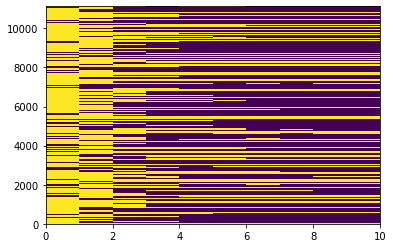

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [49]:
import pandas as pd

dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[Emotion] 5Select/TI-{model_checkpoint}-{fileTag}.csv')

In [50]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[Emotion] 5Select/ESI-{model_checkpoint}-{fileTag}.csv')